# StreetEasy Learning Project

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem. The data is from Codecacademy with the StreetEasy Research team and it is a .csv file that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens. 

Find the correlations between several features and the rent, build/evaluate a MLR model, and the model can use to present interesting findings such as: 

- “Does having a washer/dryer in unit increase the price of rent?”
- “How costly is living by a subway station in Brooklyn/Queens?” 
- And most importantly, “Is a tenant over or underpaying?”

# Import

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the data and Inspect


In [4]:
df = pd.read_csv('streeteasy.csv')

In [5]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [6]:
df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Use manhattan data only

In [7]:
dataset = df[df['borough']=='Manhattan']

In [8]:
dataset.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,All Downtown,Manhattan


In [9]:
#dataset = pd.read_csv("manhattan.csv")

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 4999
Data columns (total 20 columns):
rental_id           3539 non-null int64
building_id         3539 non-null int64
rent                3539 non-null int64
bedrooms            3539 non-null float64
bathrooms           3539 non-null int64
size_sqft           3539 non-null int64
min_to_subway       3539 non-null int64
floor               3539 non-null float64
building_age_yrs    3539 non-null int64
no_fee              3539 non-null int64
has_roofdeck        3539 non-null int64
has_washer_dryer    3539 non-null int64
has_doorman         3539 non-null int64
has_elevator        3539 non-null int64
has_dishwasher      3539 non-null int64
has_patio           3539 non-null int64
has_gym             3539 non-null int64
neighborhood        3539 non-null object
submarket           3539 non-null object
borough             3539 non-null object
dtypes: float64(2), int64(15), object(3)
memory usage: 580.6+ KB


## Exploratory Data Analysis

**Use seaborn to create a plot to compare the Borough.**

In [11]:
sns.set_style('darkgrid')

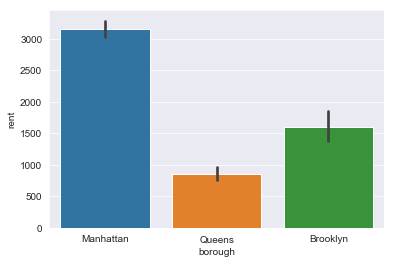

In [12]:
sns.barplot(x='borough',y='rent',data=df,estimator=np.std)

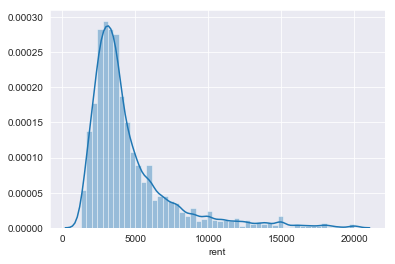

In [13]:
sns.distplot(df[('rent')])

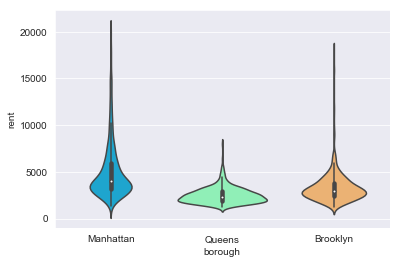

In [14]:
sns.violinplot(x="borough", y="rent", data=df,palette='rainbow')

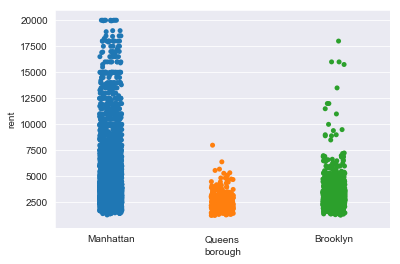

In [15]:
sns.stripplot(x="borough", y="rent", data=df,jitter=True)

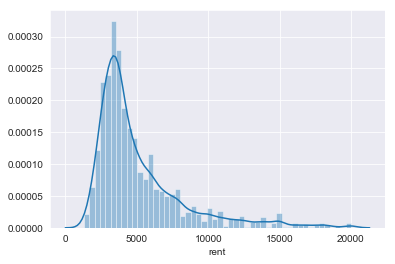

In [16]:
sns.distplot(dataset[('rent')]) # rent in manhattan

#### Visualize the manhanttan data only

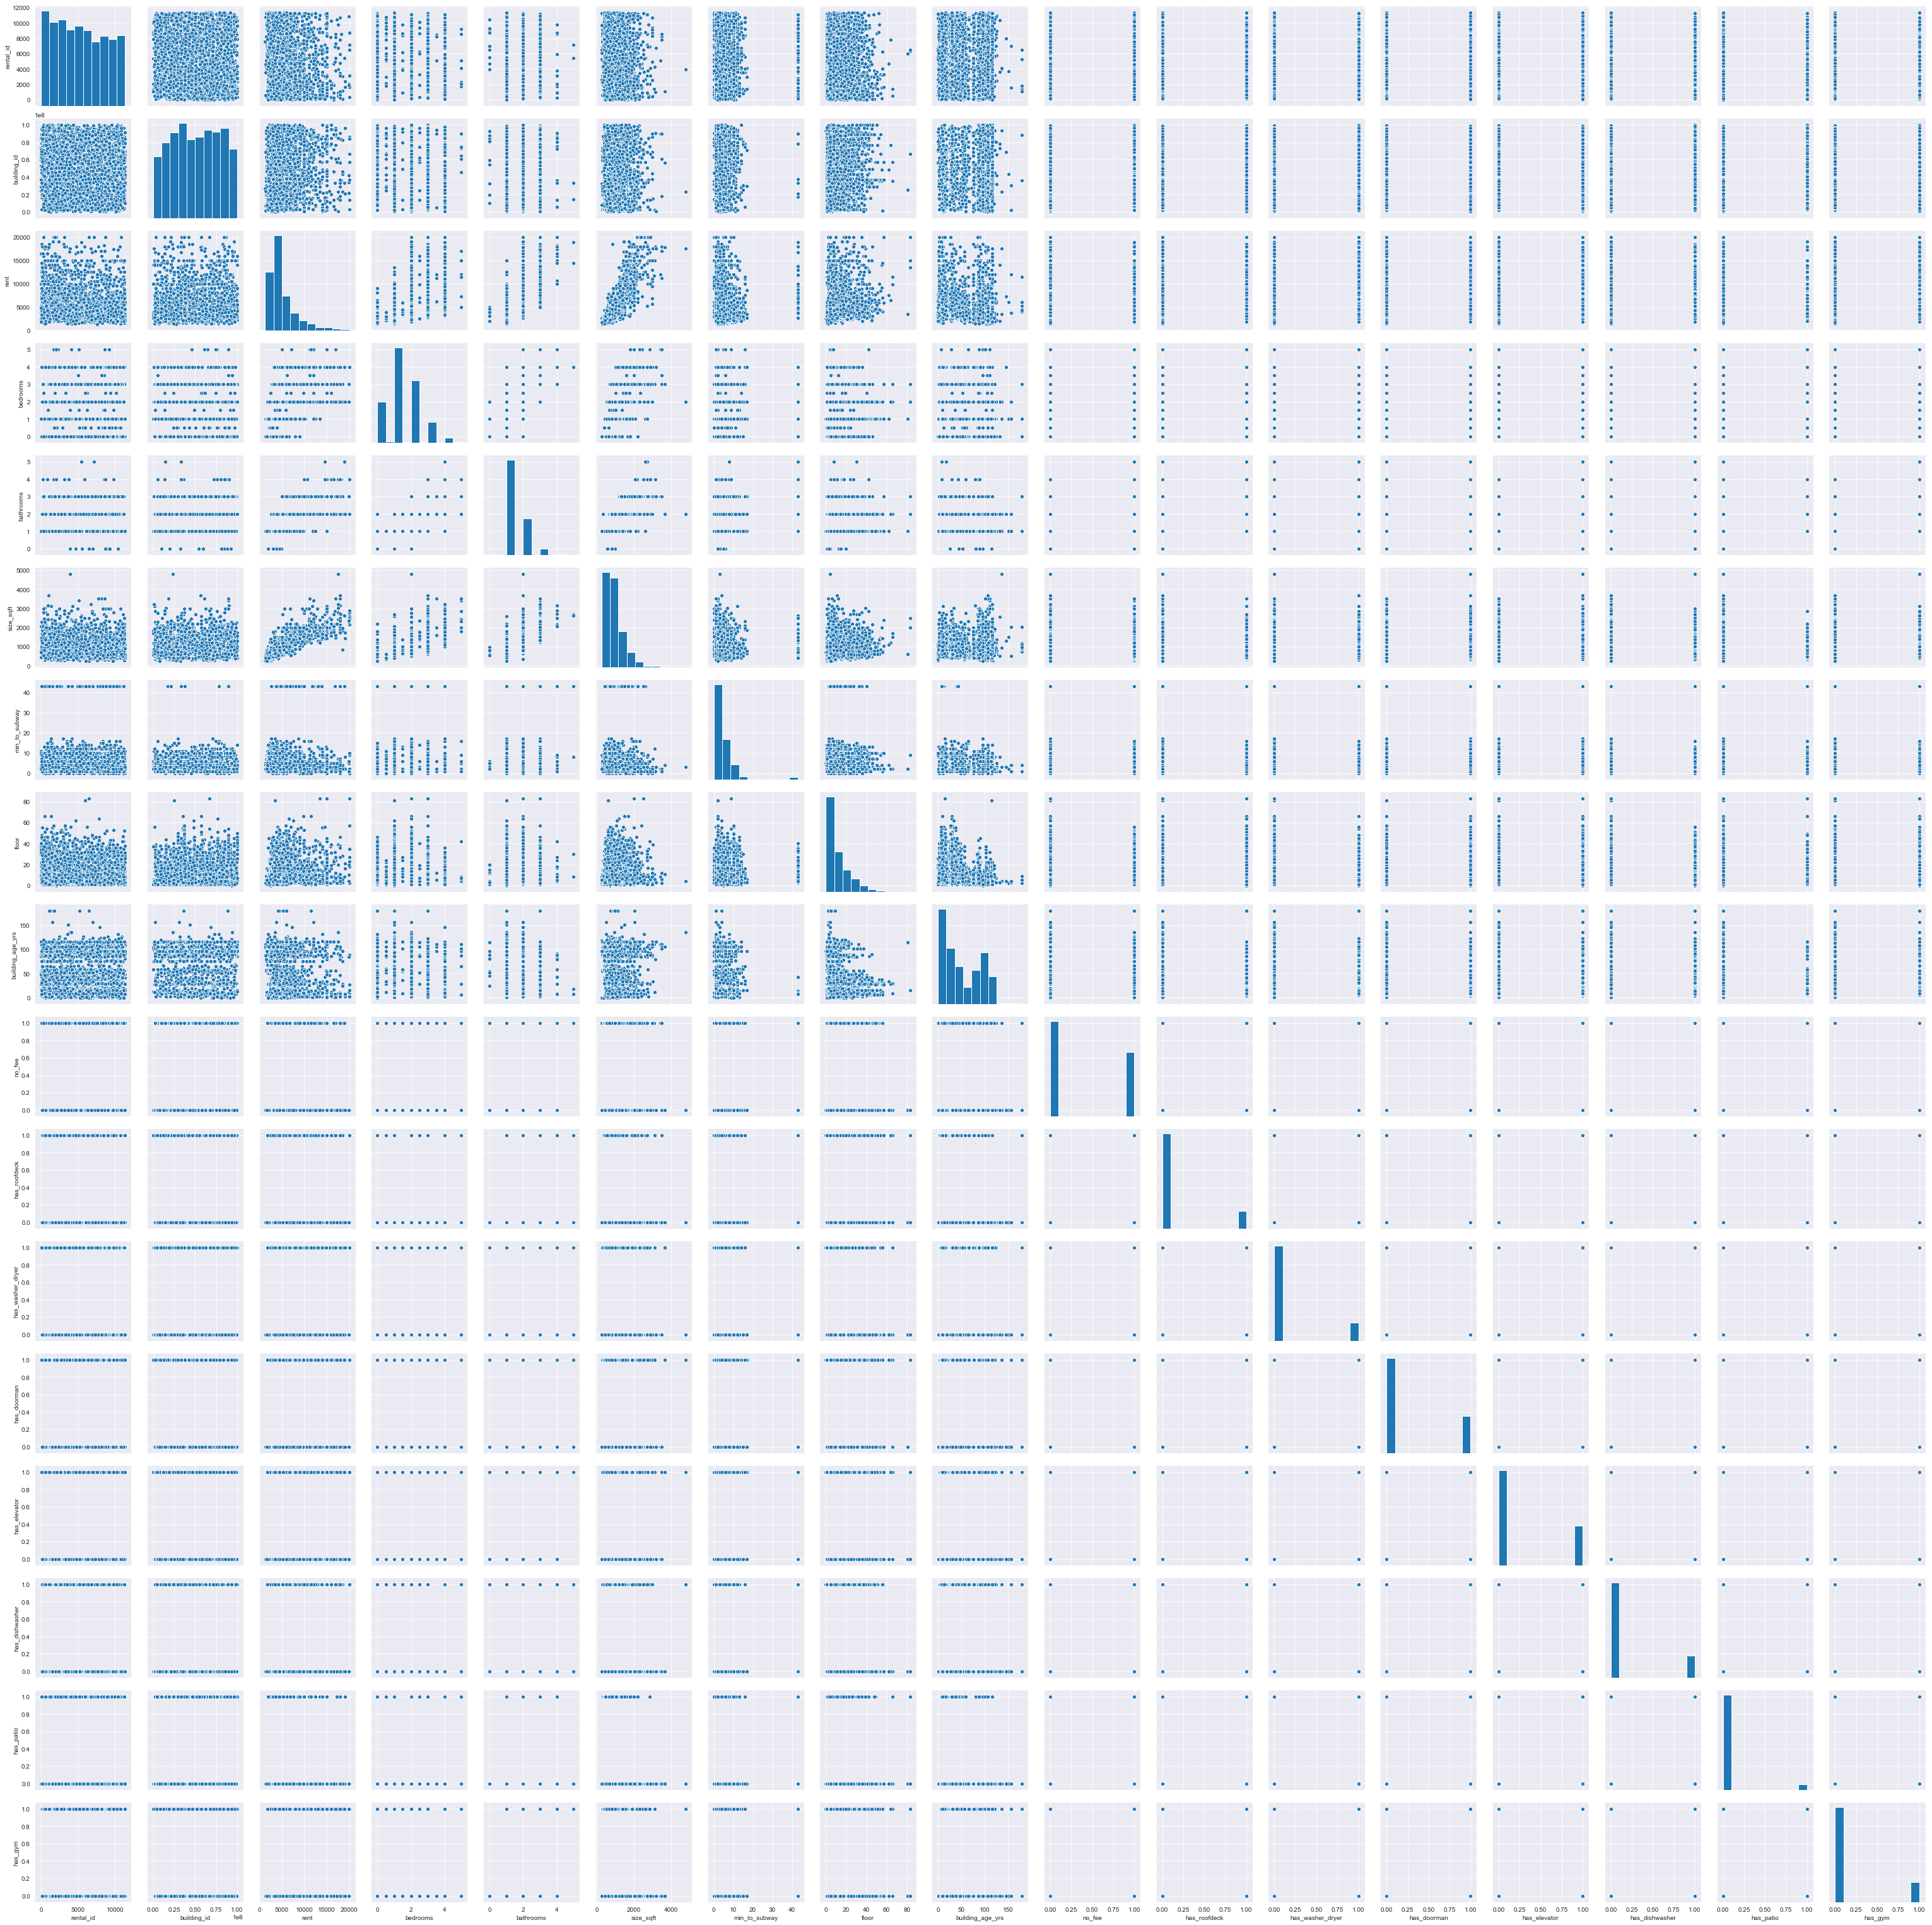

In [17]:
sns.pairplot(dataset)

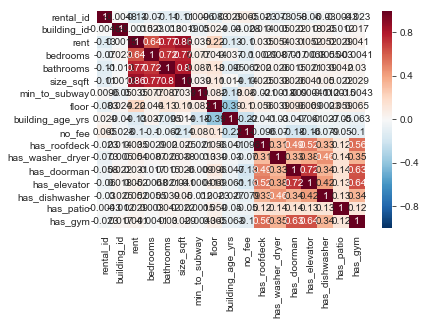

In [18]:
sns.heatmap(dataset.corr(),cmap='RdBu_r',vmin=-1,annot=True)

## Filter the Manhattan data
Base on the heatmap above, the important falls in rent to size_sqft but we will include the building_age_yrs to see the relationship.

In [19]:
new_dataset = dataset.iloc[:, 2:9]

In [20]:
new_dataset.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,2550,0.0,1,480,9,2.0,17
1,11500,2.0,2,2000,4,1.0,96
3,4500,1.0,1,916,2,51.0,29
4,4795,1.0,1,975,3,8.0,31
7,17500,2.0,2,4800,3,4.0,136


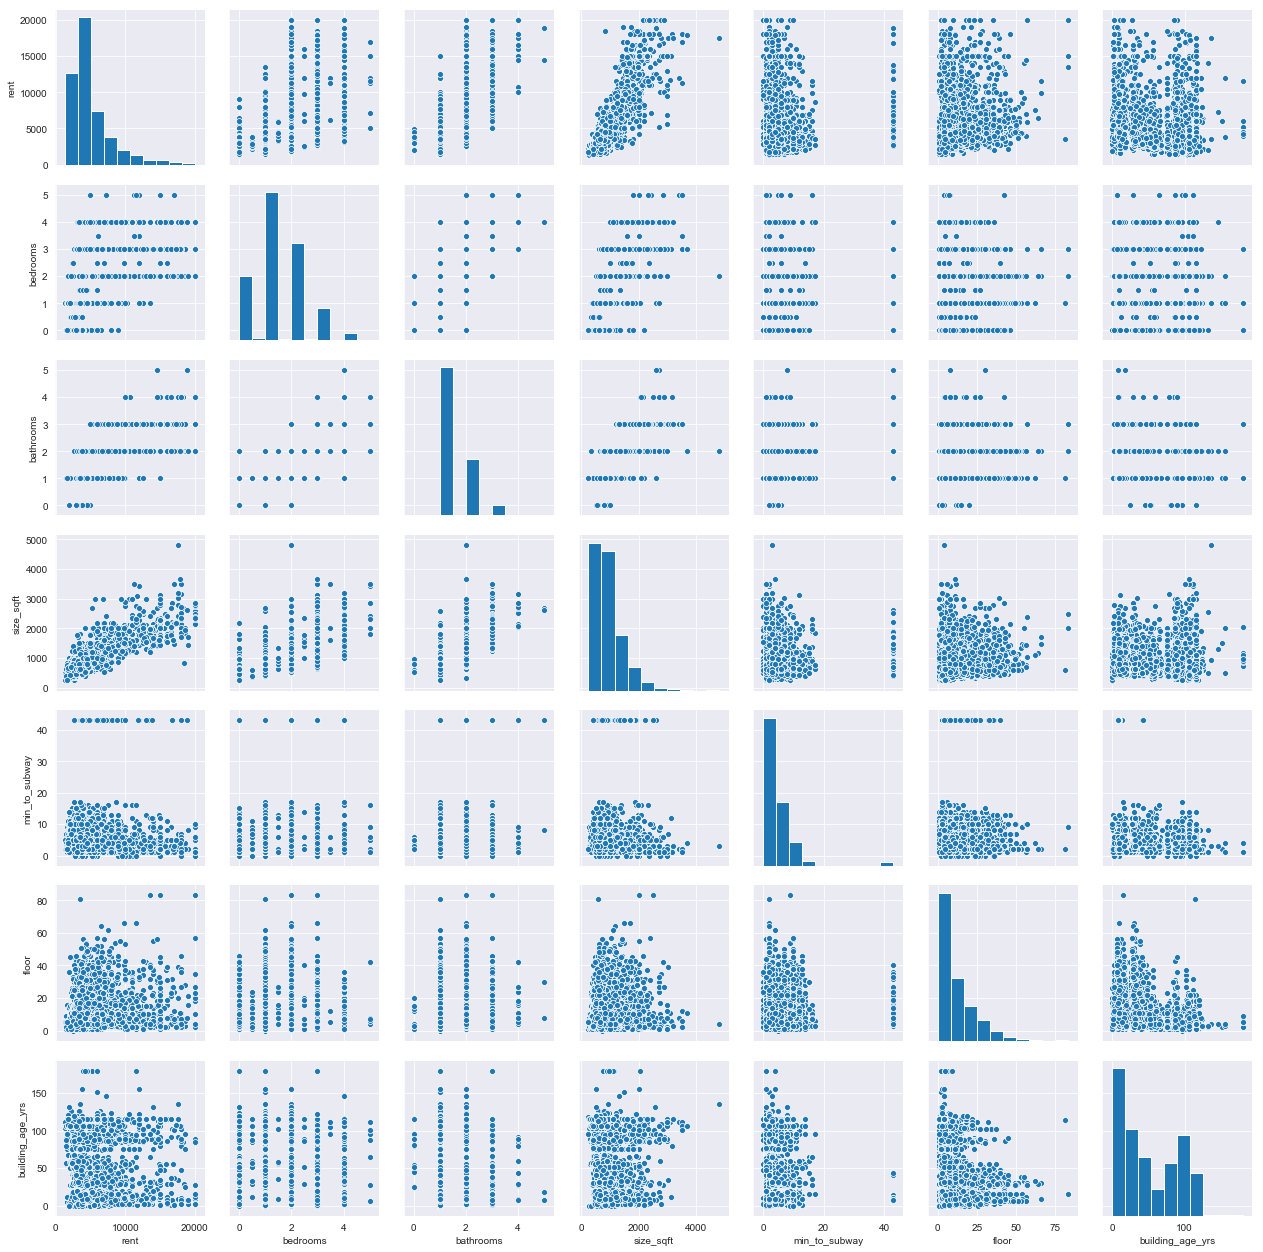

In [21]:
sns.pairplot(new_dataset)

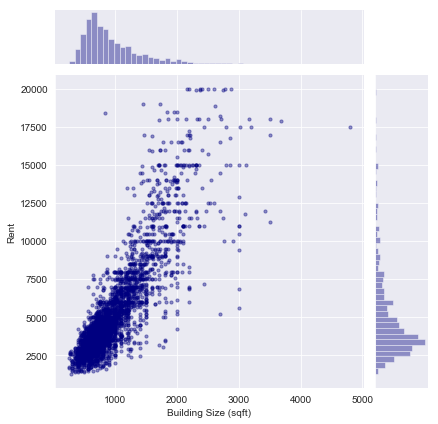

In [22]:
sizesqft_rent = sns.jointplot(x='size_sqft',
                              y='rent',
                              data=new_dataset,
                              color = 'navy',
                              s=10,
                              alpha=0.4
                             )
sizesqft_rent.set_axis_labels('Building Size (sqft)', 'Rent')

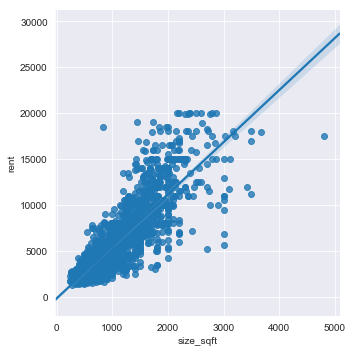

In [23]:
sns.lmplot(x='size_sqft',y='rent',data=new_dataset)

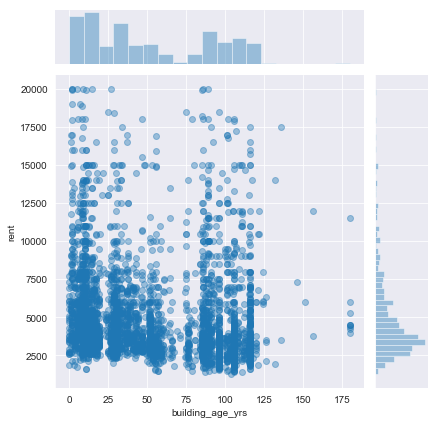

In [24]:
sns.jointplot(x='building_age_yrs',y='rent',data=new_dataset,alpha=0.4)

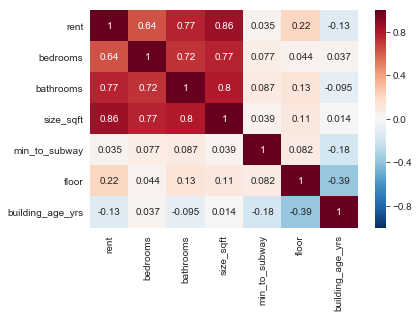

In [25]:
sns.heatmap(new_dataset.corr(),cmap='RdBu_r',vmin=-1,annot=True)

### Alternative Using Matplotlib

In [26]:
size_sq = dataset['size_sqft']
building_age = dataset['building_age_yrs']
rental = dataset['rent']

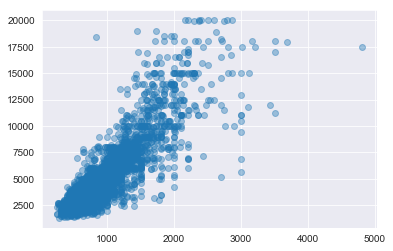

In [27]:
plt.scatter(size_sq,rental,alpha=0.4)

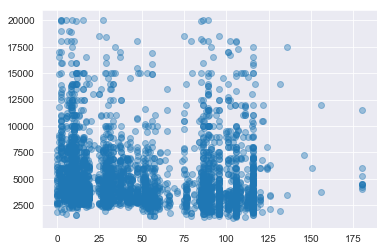

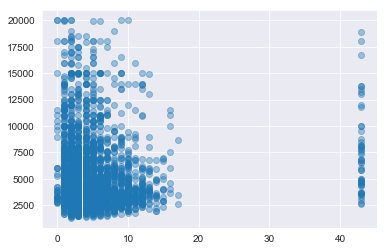

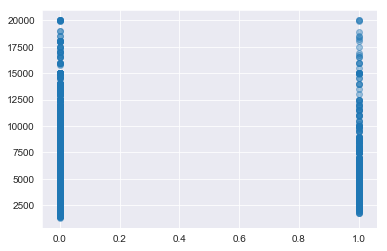

<Figure size 432x288 with 0 Axes>

In [28]:
plt.clf()
plt.scatter(dataset[['building_age_yrs']], dataset[['rent']], alpha=0.4)
plt.show()
plt.clf()
plt.scatter(dataset[['min_to_subway']], dataset[['rent']], alpha=0.4)
plt.show()
plt.clf()
plt.scatter(dataset[['has_gym']], dataset[['rent']], alpha=0.4)
plt.show()
plt.clf()

## Training and Testing Data

After explored the data, split the data into training and testing sets. Here, we using size and age of building first.

** Set a variable x equal to the numerical features and a variable y equal to the "rent" column. **

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = dataset[['size_sqft','building_age_yrs']]
y = dataset.iloc[:, 2].values

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)


# Introduction to Multiple Linear Regression
Linear regression is useful when we want to predict the values of a variable from its relationship with other variables. There are two different types of linear regression models (simple linear regression and multiple linear regression).

In predicting the price of a home, one factor to consider is the size of the home. The relationship between those two variables, price and size, is important, but there are other variables that factor in to pricing a home: location, air quality, demographics, parking, and more. When making predictions for price, our dependent variable, we’ll want to use multiple independent variables. To do this, we’ll use Multiple Linear Regression.

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on:

y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n} y=b+m 


## Training the Model

** Import LinearRegression from sklearn.linear_model **

In [32]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named regressor.**


** Train/fit lm on the training data.**

In [33]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Coefficients
Coefficients are most helpful in determining which independent variable carries more weight. 

For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively

**Print out the coefficients of the model**

In [34]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [  5.62099243 -11.54978308]


## Predicting Test Data
After fit the model, evaluate its performance by predicting off the test values!

** Use regressor.predict() to predict off the X_test set of the data.**

### Size (ft²) and building age (years) as independent variables to predict the rent ($).

When we have two independent variables, we can create a linear regression plane. We can now guess what the rent is by plugging in the independent variables and finding where they lie on the plane.

In [35]:
from mpl_toolkits.mplot3d import Axes3D

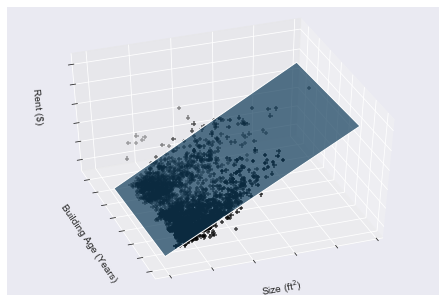

In [36]:
# Plot the figure
fig = plt.figure(1, figsize=(6, 4))
plt.clf()
elev = 43.5
azim = -110
ax = Axes3D(fig, elev=elev, azim=azim)

# plot the train dataset
ax.scatter(x_train[['size_sqft']], 
           x_train[['building_age_yrs']], 
           y_train, 
           c='k', 
           marker='+'
          )

# plot the prediction
ax.plot_surface(np.array([[0, 0], [4500, 4500]]), 
                np.array([[0, 140], [0, 140]]), 
                regressor.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), 
                alpha=.7
               )

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [37]:
predictions = regressor.predict(x_test)

Text(0, 0.5, 'Predicted Y')

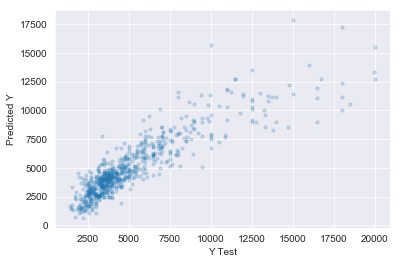

In [38]:
plt.scatter(y_test,predictions,s=10,alpha=0.2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to Wikipedia for the formulas**

In [39]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
metrics.explained_variance_score(y_test,predictions) #R square - to measure how much a variant ur model, 79% consider good.

MAE: 937.4749614572206
MSE: 2014858.0403104252
RMSE: 1419.4569526091395


0.7926727761972558

## Residuals

We should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

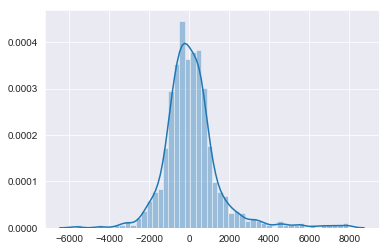

In [40]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our effort on size building or building age? Let's see if we can interpret the coefficients at all to get an idea.



In [41]:
coeffecients = pd.DataFrame(regressor.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
size_sqft,5.620992
building_age_yrs,-11.549783


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **buiding size** is associated with an **increase of 5.62 total rent**.
- Holding all other features fixed, a 1 unit increase in **building age in yrs** is associated with an **decrease of 11.55 total rent**.

In [52]:
#Test model using two features only (size and age of building) link:https://streeteasy.com/rental/2177438
sonny_apartment = [[620, 98]]

predict = regressor.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2789.28


# Analysis using more independent variable

'bedrooms', 
'bathrooms', 
'size_sqft', 
'min_to_subway', 
'floor', 
'building_age_yrs', 
'no_fee', 
'has_roofdeck', 
'has_washer_dryer', 
'has_doorman', 
'has_elevator', 
'has_dishwasher', 
'has_patio', 
'has_gym'

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset.iloc[:, 3:17].values
y = dataset.iloc[:, 2].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=6)
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_predict = mlr.predict(x_test)

## Visualize Result with Matplotlib

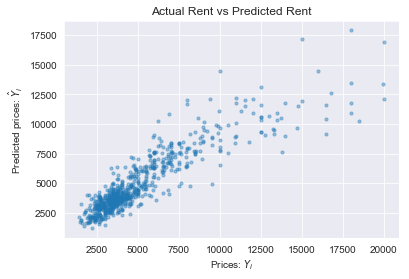

In [44]:
plt.scatter(y_test, y_predict,s=10, alpha=0.4)

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

**Print out the coefficients of the model**

In [45]:
print('Coefficients: \n', mlr.coef_)

Coefficients: 
 [-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]


## Evaluating the Model's Accuracy
sklearn‘s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

In [46]:
print("Train score:")
print(mlr.score(x_train, y_train))
print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.7725460559817883
Test score:
0.8050371975357681


In [47]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
metrics.explained_variance_score(y_test,y_predict) #R square - to measure how much a variant ur model, 81% is good.

MAE: 877.4081058353951
MSE: 1884209.5649245193
RMSE: 1372.6651321150835


0.8064486816230602

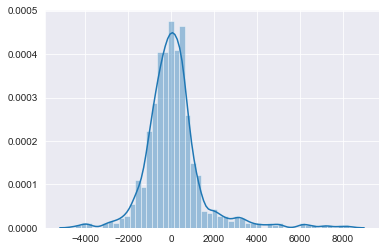

In [48]:
sns.distplot((y_test-y_predict),bins=50);

In [49]:
X_df = dataset.iloc[:, 3:17]
coeffecients = pd.DataFrame(mlr.coef_,X_df.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
bedrooms,-302.730094
bathrooms,1199.385995
size_sqft,4.799767
min_to_subway,-24.289932
floor,24.198242
building_age_yrs,-7.582725
no_fee,-140.906648
has_roofdeck,48.850174
has_washer_dryer,191.425732
has_doorman,-151.114534


## Test Model

on [Sonny’s apartment](https://streeteasy.com/rental/2177438) in Greenpoint, Brooklyn! 

The rent in the website is 2000 and our predicted model is 2451.48

In [50]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 0, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2451.48
